In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator #preprocessing images

# Data preparation

Reshape x_train
to size 60000, 28, 28, 1. Reshape x_test to size 10000, 28, 28, 1. Rescale both
results to values between zero and one as before. y_train and y_test are categorical
units, as before.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
y_train.shape

(60000,)

In [4]:
#Reshape (from 60000x28x28 to 60000x28x28x1)
x_train = np.reshape(x_train, (60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))

print((x_train.shape))
print((x_test.shape))

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
#Rescale
x_train = x_train / 255
x_test = x_test / 255

#Categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                              activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                              activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax")) #output layer


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
______________________________________________

In [8]:
#Compile the Model:
model.compile(loss='categorical_crossentropy',
   optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')


In [9]:
# Fit the model
history = model.fit(x_train, y_train, batch_size=128, 
                    epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 10s 11ms/step - loss: 0.5270 - accuracy: 0.8405 - val_loss: 0.0680 - val_accuracy: 0.9798
Epoch 2/6
375/375 [==============================] - 3s 8ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.0513 - val_accuracy: 0.9847
Epoch 3/6
375/375 [==============================] - 3s 8ms/step - loss: 0.0339 - accuracy: 0.9901 - val_loss: 0.0509 - val_accuracy: 0.9860
Epoch 4/6
375/375 [==============================] - 3s 8ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0428 - val_accuracy: 0.9870
Epoch 5/6
375/375 [==============================] - 3s 9ms/step - loss: 0.0139 - accuracy: 0.9963 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 6/6
375/375 [==============================] - 3s 8ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0456 - val_accuracy: 0.9874


## Question 10: 
Plot the training history and show this to your teacher.

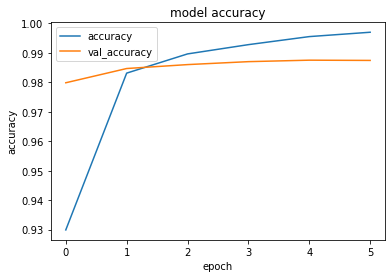

In [10]:
#Accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.legend()

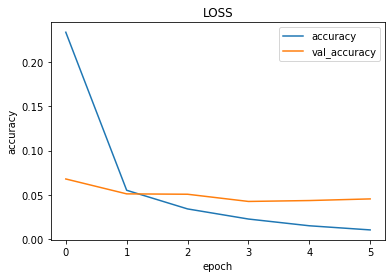

In [11]:
#Loss
plt.title('LOSS')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['loss'], label = 'accuracy')
plt.plot(history.history['val_loss'], label = 'val_accuracy')

plt.legend()

### Question 11: 
Discuss with your group, then describe to your teacher, how the training history
differs from the previous model, for the training and validation sets. What does this
tell us about the generalisation of the model?

**Answer:** 
The accuracy of the model improved significantly compared to the previous models. Even after the first epoch both the training and the test data jumped to over 0.98. However, while the training data still showed an increase in accuracy for the model, the test data barely imporved after the first epoch. As the accuracy of the training data is higher than the test data one would have to assume that the model is slightly overfitted, but for this example is nice **~1% overfitting**.

### Question 12:
Show your teacher what values you get for the model’s accuracy and loss. (Question
12, 2 points)

In [26]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [27]:
print(loss)
print(accuracy)

0.03453595191240311
0.9896000027656555


### Question 13: 
Discuss with your group, then describe to your teacher, whether this accuracy is
sufficient for some uses of automatic hand-written digit classification. (Question 13, 5
points)

**Answer**:

98,8% accuracy is good to detect digit classification, now we can **assume** that our model will work well in new data.
(generalization!). But the results depends on the context, not for every application it would be enough.

The accuracy of the model is good with ~ 0.99. However, the answer to this question depends on the the use for the model. While 99% might be perfectly sufficient for notetaking on a personal device or a less serious use, if every 100th person doesn't cannot send a check to the intended person or if every 100th letter get's send to the wrong zipcode, this would of course be an issue.

In [14]:
#Updating the model with Dropout Layers
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                              activation="relu", input_shape=(28, 28, 1)))
model2.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                              activation="relu"))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model2.add(keras.layers.Dropout(rate=0.25))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(128, activation="relu")) 
model2.add(keras.layers.Dropout(rate=0.5))
model2.add(keras.layers.Dense(10, activation="softmax")) #output layer

#Compile the Model:
model2.compile(loss='categorical_crossentropy',
   optimizer=keras.optimizers.Adadelta(learning_rate=1), metrics='accuracy')

model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [15]:
# Fit the model
history2 = model2.fit(x_train, y_train, batch_size=128, 
                    epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 4s 10ms/step - loss: 0.6104 - accuracy: 0.8028 - val_loss: 0.0697 - val_accuracy: 0.9798
Epoch 2/6
375/375 [==============================] - 4s 10ms/step - loss: 0.1035 - accuracy: 0.9699 - val_loss: 0.0597 - val_accuracy: 0.9812
Epoch 3/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0769 - accuracy: 0.9767 - val_loss: 0.0458 - val_accuracy: 0.9869
Epoch 4/6
375/375 [==============================] - 4s 11ms/step - loss: 0.0573 - accuracy: 0.9826 - val_loss: 0.0420 - val_accuracy: 0.9878
Epoch 5/6
375/375 [==============================] - 4s 11ms/step - loss: 0.0517 - accuracy: 0.9847 - val_loss: 0.0438 - val_accuracy: 0.9872
Epoch 6/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0399 - val_accuracy: 0.9892


### Question 14:
Discuss with your group, then describe to your teacher, how the training history
differs from the previous (convolutional) model, for both the training and validation
sets, and for the time taken to run each model epoch (Question 14, 3 points)


**Answer**: Now the model more less time to train and the performance is higher, with no big difference from train and validation sets in final epochs. In training set, we have start with low accuracy using dropout (on first epoch) later on follows same patterns as before with high accuracy at ends, but in the test set both have similar results. So with dropout we have a faster model with similar results. Even though the accuracy is very similar, the model 1 jumps to a higher accuracy after the first epoch, whereas the model 2 increases more slowly due to dropout in the model.


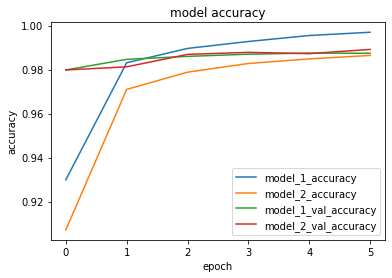

In [20]:
#suppport plot to question 14:
#Accuracy: comparison on both models (training and validation accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.plot(history.history['accuracy'], label = 'model_1_accuracy')
plt.plot(history2.history['accuracy'], label = 'model_2_accuracy')
plt.plot(history.history['val_accuracy'], label = 'model_1_val_accuracy')
plt.plot(history2.history['val_accuracy'], label = 'model_2_val_accuracy')


plt.legend()

### Question 15: 
Discuss with your group, then describe to your teacher, what this tells us about the
generalisation of the two models. (Question 15, 3 points)

**Answer**: The difference between the two models is especially important as this model does not show signs of overfitting like the model 1 where the training accuracy was better than the test accuracy. In this case the model performs even better on the test dataset. The models accuracy didn't differ much from the accuracy of model 2, however the fact that there is no indicator of overfitting makes it a better model. The distance between the training dataset and the test dataset as plottet above is smaller than in model 1 while the accuracy increased. This makes model 2 have a better generalisability.